<a href="https://colab.research.google.com/github/Selvadharshini-git/Data-Science-Internship-Basics/blob/main/statistical%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Dataset Overview ===
Shape: (150, 5)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



=== Summary Statistics ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



=== Statistics for Sepal Length (cm) ===
Mean: 5.84
Median: 5.80
Mode: 5.00
Variance: 0.68
Standard Deviation: 0.83
Minimum: 4.30
Maximum: 7.90
1st Quartile (Q1): 5.10
3rd Quartile (Q3): 6.40

=== Correlation Matrix ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


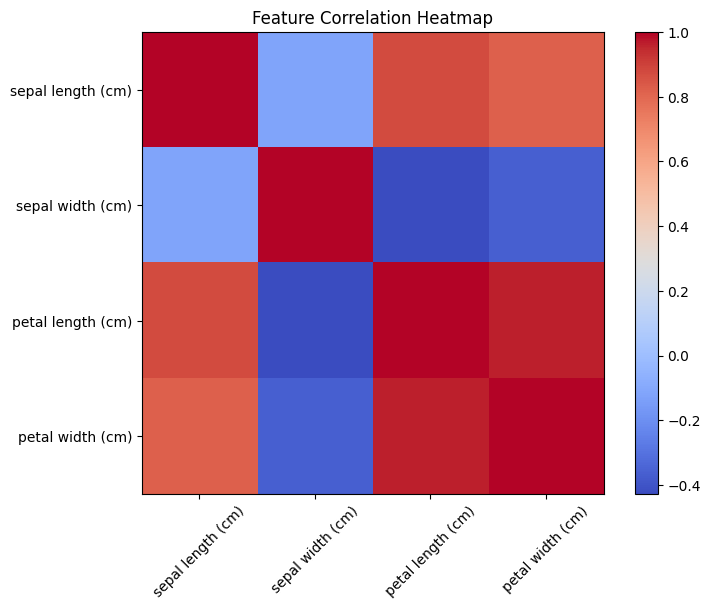


=== Feature Distributions ===


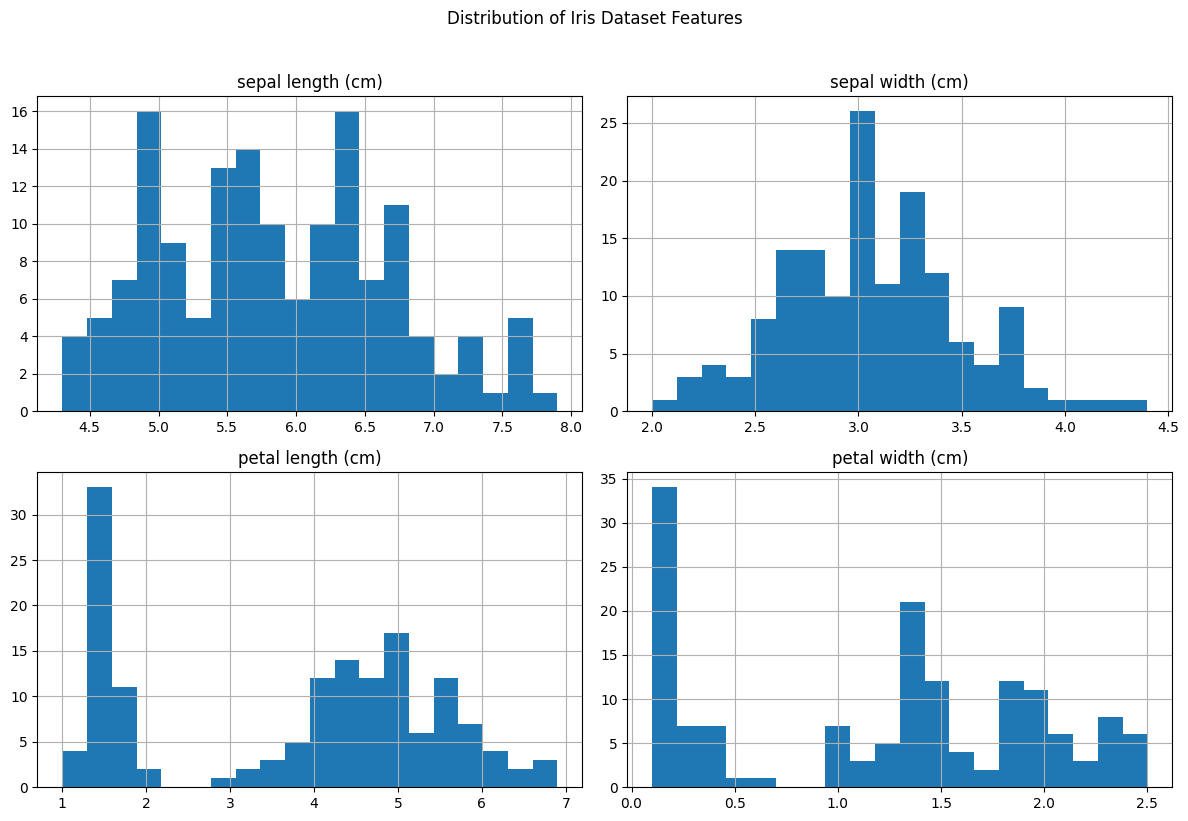

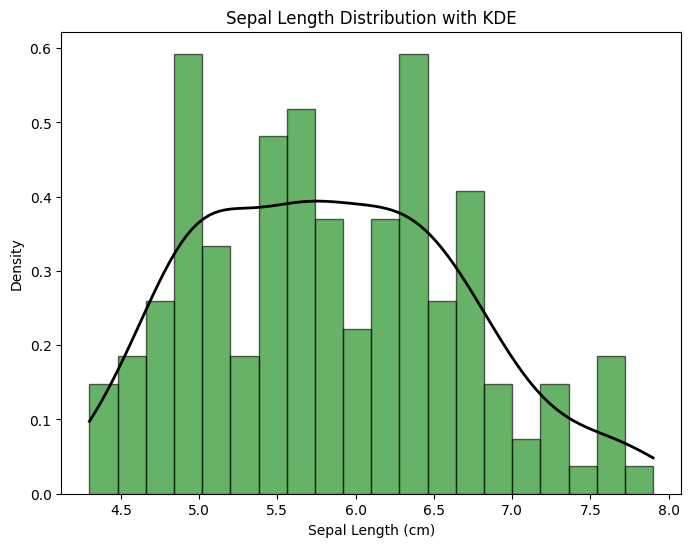


=== Statistics by Species ===


sepal length (cm)                                       \
                        mean median       std       var  min  max   
species                                                             
setosa                 5.006    5.0  0.352490  0.124249  4.3  5.8   
versicolor             5.936    5.9  0.516171  0.266433  4.9  7.0   
virginica              6.588    6.5  0.635880  0.404343  4.9  7.9   

           sepal width (cm)                             ... petal length (cm)  \
                       mean median       std       var  ...               std   
species                                                 ...                     
setosa                3.428    3.4  0.379064  0.143690  ...          0.173664   
versicolor            2.770    2.8  0.313798  0.098469  ...          0.469911   
virginica             2.974    3.0  0.322497  0.104004  ...          0.551895   

                               petal width (cm)                             \
                 var  min  max             mean median       std       var   
species                                                                      
setosa      0.030159  1.0  1.9            0.246    0.2  0.105386  0.011106   
versicolor  0.220816  3.0  5.1            1.326    1.3  0.197753  0.039106   
virginica   0.304588  4.5  6.9            2.026    2.0  0.274650  0.075433   

                      
            min  max  
species               
setosa      0.1  0.6  
versicolor  1.0  1.8  
virginica   1.4  2.5  

[3 rows x 24 columns]

<Figure size 800x600 with 0 Axes>

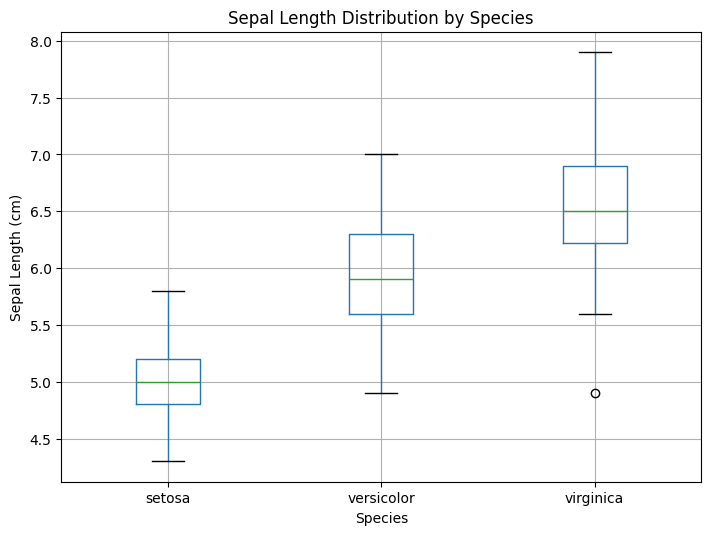

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import gaussian_kde

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target (species) to the dataframe and map to names
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display dataset info
print("=== Dataset Overview ===")
print(f"Shape: {iris_df.shape}")
print("\nFirst 5 rows:")
display(iris_df.head())

# Basic statistics for all numerical columns
print("\n=== Summary Statistics ===")
display(iris_df.describe())

# Calculate statistics for 'sepal length (cm)'
sepal_length = iris_df['sepal length (cm)']

mean = np.mean(sepal_length)
median = np.median(sepal_length)
mode = sepal_length.mode()[0]  # First mode if multiple exist
variance = np.var(sepal_length)
std_dev = np.std(sepal_length)
min_val = np.min(sepal_length)
max_val = np.max(sepal_length)
q1 = np.percentile(sepal_length, 25)
q3 = np.percentile(sepal_length, 75)

print("\n=== Statistics for Sepal Length (cm) ===")
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Minimum: {min_val:.2f}")
print(f"Maximum: {max_val:.2f}")
print(f"1st Quartile (Q1): {q1:.2f}")
print(f"3rd Quartile (Q3): {q3:.2f}")

# Correlation matrix
print("\n=== Correlation Matrix ===")
correlation_matrix = iris_df.select_dtypes(include=['float64']).corr()
display(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Feature Correlation Heatmap')
plt.show()

# Plot histograms for all numerical features
print("\n=== Feature Distributions ===")
iris_df.select_dtypes(include=['float64']).hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Iris Dataset Features', y=1.02)
plt.tight_layout()
plt.show()

# Detailed histogram for sepal length with KDE
plt.figure(figsize=(8, 6))
plt.hist(sepal_length, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')

# Add KDE plot
kde = gaussian_kde(sepal_length)
x_vals = np.linspace(sepal_length.min(), sepal_length.max(), 100)
plt.plot(x_vals, kde(x_vals), 'k-', linewidth=2)

plt.title('Sepal Length Distribution with KDE')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

# Group statistics by species
print("\n=== Statistics by Species ===")
species_stats = iris_df.groupby('species').agg(['mean', 'median', 'std', 'var', 'min', 'max'])
display(species_stats)

# Boxplot by species (for sepal length)
plt.figure(figsize=(8, 6))
iris_df.boxplot(column='sepal length (cm)', by='species', figsize=(8, 6))
plt.title('Sepal Length Distribution by Species')
plt.suptitle('')  # Remove default title
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()